In [13]:
import os
import shutil
import pandas as pd
import numpy as np
import tensorflow as tf
import neurokit2 as nk
import matplotlib.pyplot as plt

from read_record import Record,RecordReader,plot_signal_with_annotation
from scanning_window import scan_record
from collections import Counter
from transform_image import get_combined_beat_image

from neurokit2 import ecg_clean

In [14]:
folder_path=r"D:\ECG DB\LTAF"

In [29]:
file_name="07"
reading_record=RecordReader.read(folder_path,file_name,0,0,None)
reading_record._Record__label

[]

In [16]:
Counter(reading_record._Record__aux)

Counter({'': 90546,
         '(N': 457,
         '(AB': 293,
         '(SBR': 83,
         '(AFIB': 53,
         'PSE': 28,
         '(SVTA': 25,
         '(B': 16,
         '(T': 6,
         'MISSB': 1,
         '\x01 Aux': 1})

In [17]:
reading_record.get_afib_interval()

[(48029, 48289),
 (103598, 103828),
 (131988, 132286),
 (215744, 216133),
 (245520, 297024),
 (741655, 742109),
 (829103, 829474),
 (848417, 848922),
 (920902, 921246),
 (964362, 965277),
 (979996, 980482),
 (992882, 993201),
 (993496, 993841),
 (1007538, 1007954),
 (1021372, 1021687),
 (1040011, 1040346),
 (1053568, 1054068),
 (1061571, 1061917),
 (1079274, 1080058),
 (1140349, 1140729),
 (1158356, 1158856),
 (1170519, 1171040),
 (1189168, 1189608),
 (1196646, 1197051),
 (1197432, 1227298),
 (1230387, 1231470),
 (1237527, 1237845),
 (1288528, 1288818),
 (1359230, 1359623),
 (1361975, 1362558),
 (1364300, 1364719),
 (1375494, 1375912),
 (1382949, 1383281),
 (1384948, 1410942),
 (1505007, 1505423),
 (1522995, 1525608),
 (1553780, 1554251),
 (1555767, 1556936),
 (1557552, 1557616),
 (1587539, 1587910),
 (1595807, 1596447),
 (1616700, 1640330),
 (1705985, 1706453),
 (1738367, 1760340),
 (1806700, 1813059),
 (1879150, 1902513),
 (2000695, 2001080),
 (2082227, 2082665),
 (2111979, 2142555),

In [18]:
reading_record.get_nsr_interval()

[(5948, 7598),
 (8098, 17543),
 (18022, 23795),
 (24534, 24675),
 (25236, 27252),
 (27889, 29130),
 (29802, 30147),
 (30594, 34853),
 (35501, 35671),
 (36538, 37050),
 (37887, 38946),
 (39340, 40289),
 (41105, 46238),
 (47253, 48029),
 (48289, 50390),
 (51653, 52087),
 (52630, 54311),
 (54738, 55181),
 (57854, 59144),
 (59560, 59718),
 (61320, 62432),
 (63511, 64772),
 (65128, 65735),
 (66225, 69689),
 (69879, 71035),
 (71416, 73863),
 (74240, 77324),
 (77758, 81242),
 (81898, 82108),
 (82777, 88733),
 (89213, 90282),
 (90996, 95841),
 (96547, 101957),
 (103407, 103598),
 (103828, 106176),
 (106410, 107846),
 (108305, 110635),
 (111110, 111861),
 (112178, 113818),
 (114815, 116498),
 (117254, 117464),
 (118022, 118693),
 (119230, 119421),
 (120019, 120878),
 (121511, 128462),
 (128752, 131988),
 (132286, 134252),
 (135034, 138085),
 (138670, 143215),
 (143813, 146461),
 (147011, 148766),
 (149746, 152802),
 (153947, 154438),
 (155230, 156971),
 (157536, 157834),
 (158417, 160295),
 (16

In [19]:
#reading_record.plot_signal_with_annotation()

In [30]:
test_scan=scan_record(reading_record,window_width=30)
test_scan

There's rhythm annotation. dict_keys(['(N', '', '(B', '\x01 Aux', '(AB', '(T', '(SVTA', '(AFIB', 'PSE', 'MISSB'])
NSR interval is from [(16418, 231743), (232983, 251147), (254282, 322867), (323360, 348154), (355158, 359634), (360130, 387637), (388314, 402597), (404602, 421308), (422164, 429503), (432590, 533435), (533926, 541531), (542014, 546978), (547475, 632419), (632901, 650835), (651331, 658387), (659279, 675235), (677355, 730317), (730815, 741989), (744876, 1027772), (1028284, 1033393), (1036131, 1052591), (1053108, 1137678), (1138372, 1143115), (1148712, 1244282), (1244762, 1273030), (1273695, 1279209), (1285510, 1296643), (1297111, 1314955), (1315760, 1319604), (1320060, 1328262), (1328713, 1337988), (1339696, 1346824), (1347270, 1357210), (1357664, 1366560), (1367007, 1371307), (1371758, 1379254), (1380032, 1385232), (1385670, 1398147), (1407481, 1416180), (1420479, 1426647), (1429741, 1436673), (1437118, 1444090), (1444697, 1451476), (1452083, 1568282), (1569119, 1573713), (1

ZeroDivisionError: division by zero

In [21]:
Counter(test_scan.true_class)

Counter({'AF': 45840, 'Others': 6140})

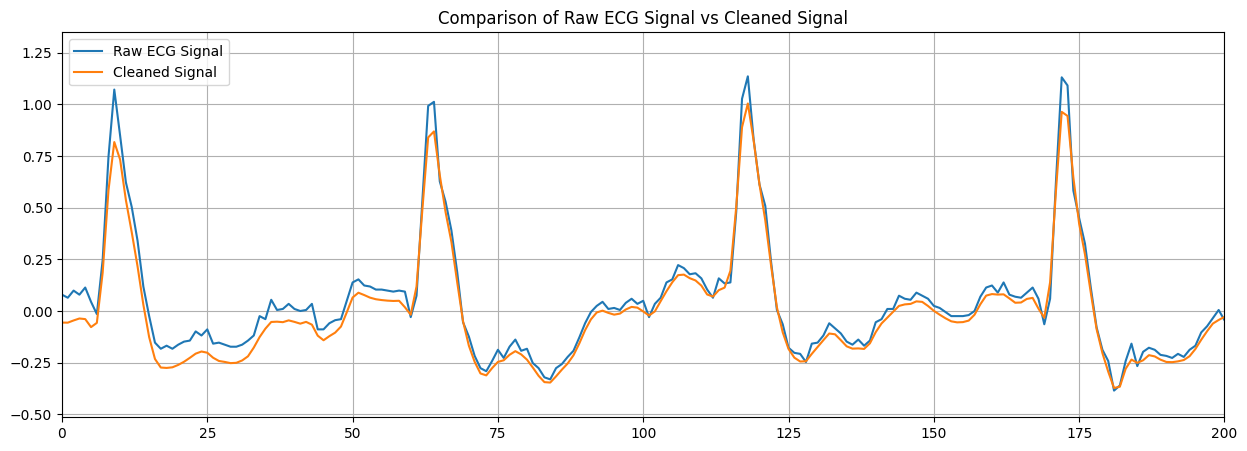

In [28]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 5))

ax.grid(True)

# Plot the raw ECG signal multiplied by 2 (assuming 'test_scan' is a DataFrame)
ax.plot( test_scan.iloc[100][:-8], label='Raw ECG Signal')

clean_signal=ecg_clean(list(test_scan.iloc[100][:-8]),sampling_rate=128)
# Plot the cleaned signal (assuming 'clean_signal' is another signal)
ax.plot(clean_signal, label='Cleaned Signal')

# Set the title for the plot
ax.set_title("Comparison of Raw ECG Signal vs Cleaned Signal")

ax.set_xlim(0,200)
# Add a legend
ax.legend()

# Show the plot
plt.show()


<Figure size 640x480 with 0 Axes>

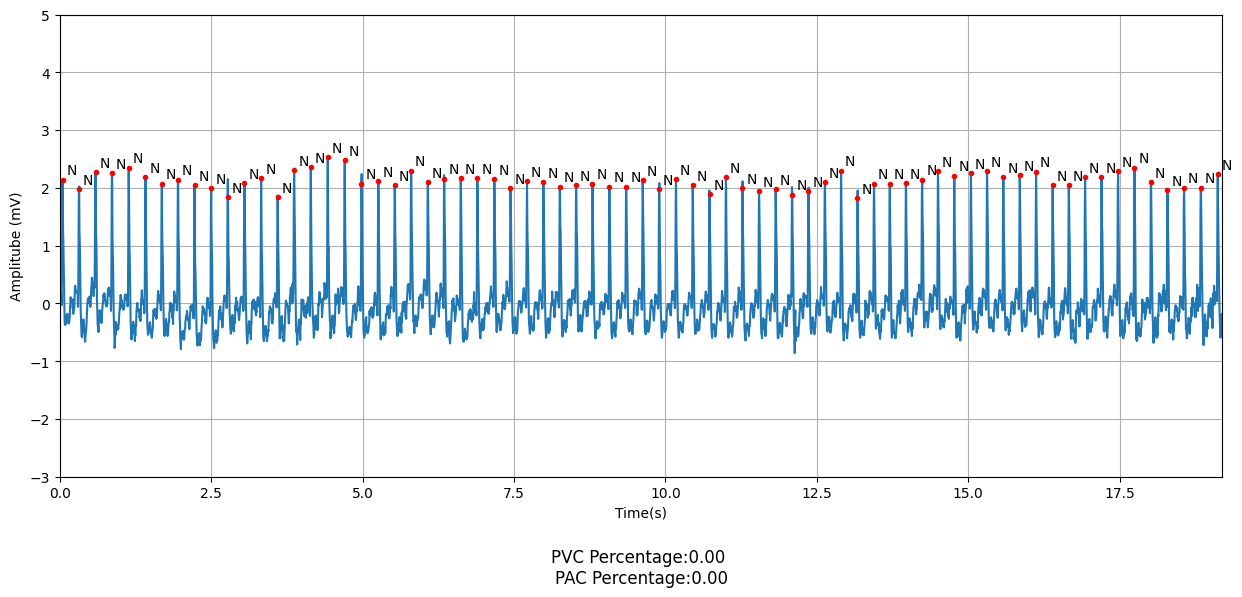

In [23]:
plot_signal_with_annotation(2*test_scan.iloc[100][:-8],
                            test_scan.iloc[100]['beat_annotation_symbols'],
                             test_scan.iloc[100]['annotated_samples'],200,
                             'r.', figsize=(15, 6))

<Figure size 640x480 with 0 Axes>

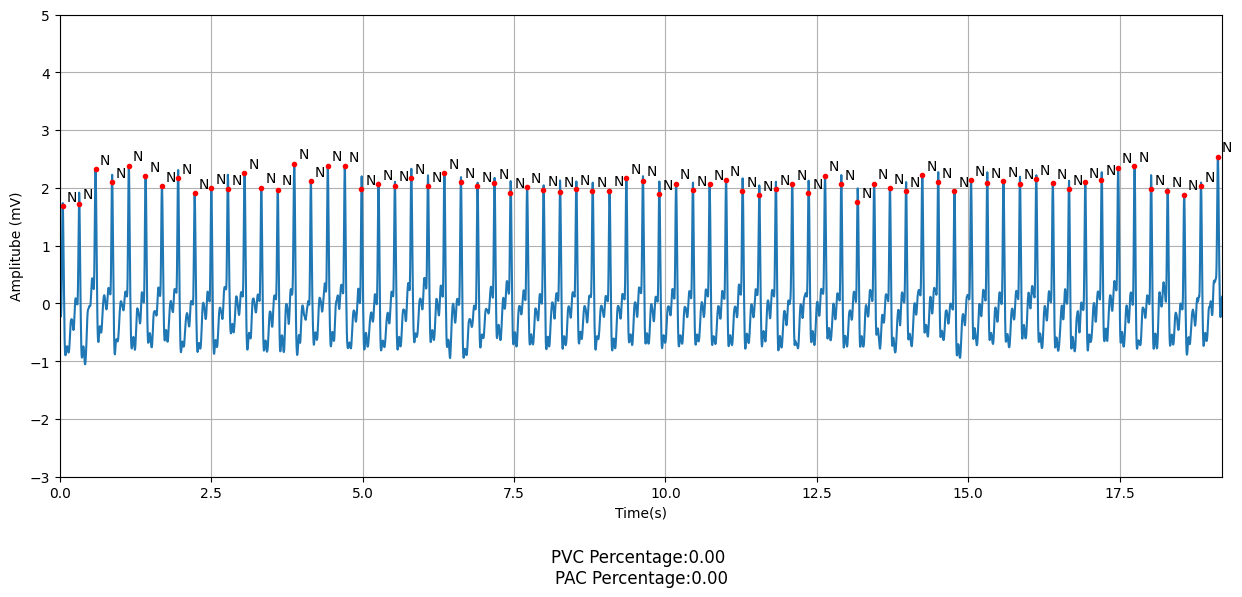

In [24]:
clean_signal=ecg_clean(list(3*test_scan.iloc[100][:-8]),sampling_rate=200)
plot_signal_with_annotation(clean_signal,
                            test_scan.iloc[100]['beat_annotation_symbols'],
                             test_scan.iloc[100]['annotated_samples'],200,
                             'r.', figsize=(15, 6)) 

In [ ]:
# # Filter the DataFrame for rows where 'true_class' is 'pac'
# pac_df = test_scan[test_scan['true_class'] == 'PAC']

# # Save the filtered DataFrame to a CSV file
# pac_df.to_csv('data_104_21_pac.csv', index=False)

In [ ]:
# # Select rows from 30 to 60 (note that the end index is exclusive)
# selected_rows = test_scan.iloc[ 6:775]
# # Save the selected rows to a CSV file
# selected_rows.to_csv('data_89_13_pac.csv', index=False)

In [ ]:
get_combined_beat_image(signal=clean_signal,
                        bpm=test_scan.iloc[431]['avg_heart_rate'],
                        voltage_range=[-3, 3], 
                        folder_name='test', img_name='Test_beat')

In [ ]:
record_files=[file[:-4] for file in os.listdir(folder_path) if file.endswith('atr')]
#record_files

In [ ]:
def process_all_records(folder_path, type=None):
    """
    Process all ECG records in a specified folder, segment them, filter based on a specified type,
    and generate corresponding CSV files and combined beat images.

    Parameters:
    - folder_path (str): The path to the folder containing the ECG record files.
    - type (str): The type of segments to filter (e.g., 'Pure_NSR'). If None, no filtering is applied.

    Returns:
    None

    Raises:
    ValueError: If the specified folder_path does not exist or if an invalid type is provided.
    """
    
    # Create the CSV folder if it doesn't exist
    csv_folder = f'{type}_data'
    if not os.path.exists(csv_folder):
        os.makedirs(csv_folder)

    # Loop through each file in record_files
    for file in record_files:
        print(f'{file}')
        csv_file_path = os.path.join(csv_folder, f"{file}_{type}.csv")
        
        # Check if the CSV file already exists
        if os.path.exists(csv_file_path):
            print(f"{file}_{type}.csv file is already created in {csv_folder}")
        else:        
            # Read the ECG record
            record = RecordReader.read(folder_path, file, 0, 0, None)
            if record._Record__label == 'non atrial fibrillation':
                # Segment the ECG record
                segments = scan_record(record, window_width=30)
                # Filter segments based on the specified type (e.g., 'Pure_NSR')
                buffer_dataframe = segments[segments['true_class'] == f'{type}']
                
                # Save filtered data to CSV
                buffer_dataframe.to_csv(csv_file_path, index=False)
                
                #print(f"CSV file created: {csv_file_path}")

                # Process each segment
                for i in range(len(buffer_dataframe)):
                    signal = np.array(list(buffer_dataframe.iloc[i][0:5999]))
                    clean_signal = nk.ecg_clean(signal, 200)
                    # Generate a combined beat image
                    get_combined_beat_image(signal=clean_signal,
                                            bpm=buffer_dataframe.iloc[i]['avg_heart_rate'],
                                            voltage_range=[-3, 3],
                                            folder_name=f'{type}_image', img_name=f'{file}_{i}')



In [ ]:
process_all_records(folder_path,'Pure_NSR')
